This notebook contain some experiment to try to explore the molecule entities: 

Qui ci servono poche caratteristiche portanti, che caratterizzino la sostanza su alcuni aspetti salienti. Ci servono quindi dei valori per queste caratteristiche:

•	Reactivity

•	Stability

•	Polarity

•	Steric property

•	Flexibility/rigidity

•	Simmetry

•	Size

Questi valori possono essere ottenuti da (insiemi di) descrittori.


## Graph 

In [106]:
import deepchem as dc
import pandas as pd
import networkx as nx
from rdkit import Chem
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool1D, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
import matplotlib.pyplot as plt

In [107]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv', splitter='random')

In [108]:
train, valid, test = datasets

In [117]:
n_tasks = len(tasks)
model_GCM = dc.models.GraphConvModel(n_tasks, mode='regression') 
model_GCM.fit(train, nb_epoch=10)

C:\Users\edoar\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_9/Reshape_14:0", shape=(370,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_9/Reshape_13:0", shape=(370, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_9/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\edoar\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_9/Reshape_17:0", shape=(1154,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_9/

C:\Users\edoar\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_8/Reshape_20:0", shape=(1098,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_8/Reshape_19:0", shape=(1098, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_8/Cast_6:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
C:\Users\edoar\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_8/Reshape_23:0", shape=(164,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_4/graph_pool_8

0.3253049468994141

In [118]:
# Evaluate
metric = dc.metrics.Metric(dc.metrics.mean_squared_error)
print('Training set score:', model_GCM.evaluate(train, [metric], transformers))
print('Test set score:', model_GCM.evaluate(valid, [metric], transformers))

Training set score: {'mean_squared_error': 2.5936715211422046}
Test set score: {'mean_squared_error': 3.463839604733769}


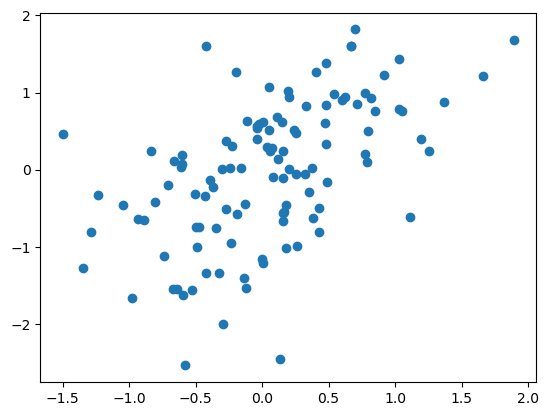

In [120]:
y_preds = model_GCM.predict(test)
plt.scatter(y_preds, test.y)

### Coulomb for solubility

In [49]:
X_train = pd.DataFrame(zip(train.ids, train.y), columns=['SMILES', 'solubility'])
X_train['solubility'] = [i[0] for i in X_train['solubility']]
X_valid = pd.DataFrame(zip(valid.ids, valid.y), columns=['SMILES', 'solubility'])
X_valid['solubility'] = [i[0] for i in X_valid['solubility']]
X_test = pd.DataFrame(zip(test.ids, test.y), columns=['SMILES', 'solubility'])
X_test['solubility'] = [i[0] for i in X_test['solubility']]

In [50]:
coulomb_mat = dc.feat.CoulombMatrix(max_atoms=30)
X_train['X'] = [coulomb_mat(Chem.MolFromSmiles(smi)) for smi in X_train['SMILES']]
X_valid['X'] = [coulomb_mat(Chem.MolFromSmiles(smi)) for smi in X_valid['SMILES']]
X_test['X'] = [coulomb_mat(Chem.MolFromSmiles(smi)) for smi in X_test['SMILES']]

X_train = X_train.drop(X_train[X_train['X'].apply(lambda x: x.shape[1] == 0)].index)
X_train.reset_index(inplace=True, drop=True)
X_train['X'] = [i[0] for i in X_train['X']]
X_valid = X_valid.drop(X_valid[X_valid['X'].apply(lambda x: x.shape[1] == 0)].index)
X_valid.reset_index(inplace=True, drop=True)
X_valid['X'] = [i[0] for i in X_valid['X']]
X_test = X_test.drop(X_test[X_test['X'].apply(lambda x: x.shape[1] == 0)].index)
X_test.reset_index(inplace=True, drop=True)
X_test['X'] = [i[0] for i in X_test['X']]

y_train_np = X_train['solubility'].to_numpy()
X_train_np = np.array([np.array(val) for val in X_train['X']])
y_valid_np = X_valid['solubility'].to_numpy()
X_valid_np = np.array([np.array(val) for val in X_valid['X']])
y_test_np = X_test['solubility'].to_numpy()
X_test_np = np.array([np.array(val) for val in X_test['X']])

Failed to featurize datapoint 0, CCCCCCCCCCCC(=O)OC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=C1OC(c2ccc(O)cc2)(c2ccc(O)cc2)c2ccccc21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCN1c2ccccc2N(C)C(=O)c2cccnc21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCCCCCCO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=c1[nH]c2c(c(=O)n1C1CCCCC1)CCC2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc2c(N)nc(N3CCN(C(=O)OCC(C)(C)O)CC3)nc2c(OC)c1OC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCC1(C2=CCC3CCC2C3)C(=O)NC(=O)NC1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCN1c2ncccc2C(=S)N(C)c2cccnc21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ccc2c(ccc3c4c5c(cccc5cc32)CC4)c1. Appending empty array
Exception message: 
Failed to featurize d

Exception message: 
Failed to featurize datapoint 0, CN(C)C(=O)C(c1ccccc1)c1ccccc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=C1C=C2CC3(O)COc4c(ccc(O)c4O)C3=C2C=C1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CNC(=O)Oc1ccc(N(C)C)c(C)c1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)OCC(=O)C1(O)C(OC(C)=O)CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC21C. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1COC2CC3(C)C(CC4C5C=C6CC(O)CCC6(C)CC5CCC43C)OC2C1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCC(=O)OCN1C(=O)NC(c2ccccc2)(c2ccccc2)C1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, c1ccc2cc3c(cc2c1)-c1cccc2cccc-3c12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc(C2

Exception message: 
Failed to featurize datapoint 0, CCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)OC1(C(C)=O)CCC2C3C=C(C)C4=CC(=O)CCC4(C)C3CCC21C. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCCCCO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCCC(C)=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=C1CN=C(c2ccccc2Cl)c2cc([N+](=O)[O-])ccc2N1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CSCS(=O)CC(CO)NC(=O)C=Cc1c(C)[nH]c(=O)[nH]c1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCNc1nc(NC(C)(C)C)nc(SC)n1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1. Appending empty arra

Exception message: 
Failed to featurize datapoint 0, CCCCCCCCCCCCCCCCO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCC(C)C1(CC)C(=O)NC(=O)NC1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1ccc(C(c2ccc(OC)cc2)C(Cl)(Cl)Cl)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1OC(OC2C(O)CC(OC3C(O)CC(OC4CCC5(C)C(CCC6C5CC(O)C5(C)C(C7=CC(=O)OC7)CCC65O)C4)OC3C)OC2C)CC(O)C1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CS(=O)(=O)c1ccc(C(O)C(CO)NC(=O)C(Cl)Cl)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, OCC1OC(OC2(CO)OC(CO)C(O)C2O)C(O)C(O)C1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=C(Cn1ccnc1[N+](=O)[O-])NCc1ccccc1. Appending empty array
Exception message: 
Failed to featurize datap

Exception message: 
Failed to featurize datapoint 0, CCN(CC)c1nc(Cl)nc(NC(C)C)n1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COC(=O)Nc1cccc(OC(=O)Nc2cccc(C)c2)c1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC12CCC(=O)C=C1CCC1C2CCC2(C)C(O)CCC12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COC(=O)c1ccccc1OC1OC(COC2OCC(O)C(O)C2O)C(O)C(O)C1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCC(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC(=O)O3)C21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1CC2C3CC(F)C4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O)C(=O)CO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C. Appending empty array
Exception message: 
Failed to featurize data

In [96]:
model_solubility = Sequential([
    Conv1D(filters=10, kernel_size=3, padding='same', strides=1),
    MaxPool1D(2),
    InputLayer(input_shape=(30,30)),
    Flatten(),
    Dense(100, activation= 'relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dense(1)
])

In [97]:
# Compile a model
model_solubility.compile(loss=mae,
                        optimizer=Adam(),
                        metrics=['MeanAbsoluteError'])

In [105]:
# Fit the model
model_solubility.fit(X_train_np, y_train_np, epochs=100, 
                     batch_size=32)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5038 - mean_absolute_error: 0.5038
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5295 - mean_absolute_error: 0.5295
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4926 - mean_absolute_error: 0.4926
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5023 - mean_absolute_error: 0.5023
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5167 - mean_absolute_error: 0.5167
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5114 - mean_absolute_error: 0.5114
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5109 - mean_absolute_error: 0.5109
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5217 - mean_absolute_error: 0.5217
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4899 - mean_absolute_error: 0.4899
Epoch 10/1

20/20 [==============================] - 0s 3ms/step - loss: 0.3953 - mean_absolute_error: 0.3953
Epoch 75/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3844 - mean_absolute_error: 0.3844
Epoch 76/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3507 - mean_absolute_error: 0.3507
Epoch 77/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3768 - mean_absolute_error: 0.3768
Epoch 78/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3524 - mean_absolute_error: 0.3524
Epoch 79/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3838 - mean_absolute_error: 0.3838
Epoch 80/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3735 - mean_absolute_error: 0.3735
Epoch 81/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3593 - mean_absolute_error: 0.3593
Epoch 82/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3709 - mean_absolute_error: 0.3709
Epoch 83/100
2

In [93]:
model_solubility.evaluate(X_valid_np, y_valid_np)

3/3 [==============================] - 0s 33ms/step - loss: 0.5674 - mean_absolute_error: 0.5674


[0.5674489736557007, 0.5674489736557007]

3/3 [==============================] - 0s 2ms/step


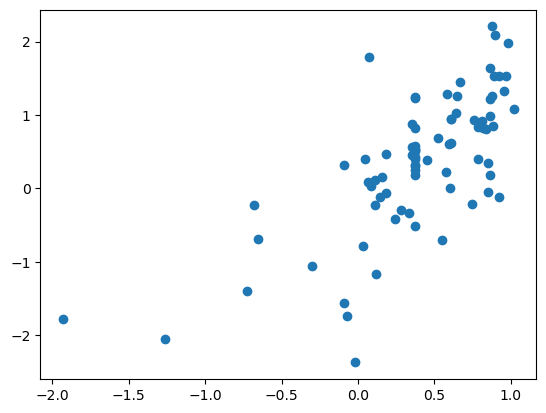

In [100]:
y_preds = model_solubility.predict(X_valid_np)
plt.scatter(y_preds, y_valid_np)

## Coulomb

In [29]:
import deepchem as dc
from rdkit import Chem
import pandas as pd
import numpy as np

In [2]:
Dataset = pd.read_excel("Dataset.xlsx", index_col='Unnamed: 0')
Dataset

,SMILES,Experimental value
0,O=CC,1
1,ON=CC,0
2,O=C(N)C,1
3,O=C(NC1CCCCC1)NS(=O)(=O)c2ccc(cc2)C(=O)C,0
4,O=[N+]([O-])c1oc(cc1)c2cnc(NN=C(C)C)s2,1
...,...,...
1765,O=C(OC)c1nc2cc(c3cccnc3(c2(o1)))Cl,0
1766,OC(COc1ccccc1(OCC=C))CNC(C)C,0
1767,O=C3C(=C(O)N)C(=O)C4(O)(C(=O)C2=C(O)c1c(O)cccc...,0
1768,O=C(OCC)c1ccccc1C3=C4C=C(C(=NCC)C=C4(Oc2cc(NCC...,0


In [3]:
coulomb_mat = dc.feat.CoulombMatrix(max_atoms=30)
features_list = [coulomb_mat(Chem.MolFromSmiles(smi)) for smi in Dataset['SMILES']]
Dataset['Coulomb'] = features_list

C:\Users\edoar\AppData\Roaming\Python\Python310\site-packages\deepchem\feat\molecule_featurizers\coulomb_matrices.py:145: RuntimeWarning: divide by zero encountered in divide
  m = np.outer(z, z) / d
Failed to featurize datapoint 0, CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc2c(c3c1c(=O)c1ccccc1n3C)C=CC(C)(C)O2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1c2oc3c(C)ccc(C(=O)NC4C(=O)NC(C(C)C)C(=O)N5CCCC5C(=O)N(C)CC(=O)N(C)C(C(C)C)C(=O)OC4C)c3nc-2c(C(=O)NC2C(=O)NC(C(C)C)C(=O)N3CCCC3C(=O)N(C)CC(=O)N(C)C(C(C)C)C(=O)OC2C)c(N)c1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc2c(c3oc(=O)c4c(c13)CCC4O)C1C=COC1O2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc2c(c3oc(=O)c4c(c13)CCC4=O)C1C=COC1O2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1cc(N=Nc2ccccc2C)ccc1N. Appending empty a

Exception message: 
Failed to featurize datapoint 0, CN(C)c1ccc(N=Nc2ccccc2)cc1. Appending empty array
Exception message: 
[14:50:46] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[14:50:46] UFFTYPER: Unrecognized charge state for atom: 1
Failed to featurize datapoint 0, CN(C)CNc1nnc(C=Cc2ccc([N+](=O)[O-])o2)o1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCCCCCC[N+](C)(C)[O-]. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)(C)c1cc([N+](=O)[O-])cc([N+](=O)[O-])c1OS(C)(=O)=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCOP(=S)(OCC)SC1OCCOC1SP(=S)(OCC)OCC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCN(CCCCC)N=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, c1ccc(Nc2ccc(Nc3ccccc3)cc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCCCCCCC(=O)COC1=C(O)C(=O)OC1C(O)CO. Appending em

Exception message: 
Failed to featurize datapoint 0, CCCCC(C)(O)CC=CC1C(O)CC(=O)C1CCCCCCC(=O)OC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1C(=O)OC2CCN3CC=C(COC(=O)C(C)(O)C1(C)O)C23. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=[N+]([O-])c1ccc(-c2nc(N3CCOCC3)c3ccccc3n2)s1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)(Oc1ccc(C2CCCc3ccccc32)cc1)C(=O)O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1cccc(C)c1NC(=O)CN1CCCC1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)Nc1nc(NC(C)=O)nc(-c2ccc([N+](=O)[O-])o2)n1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)Oc1ccccc1OC(=O)N(C)N=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1CN(N=O

Exception message: 
Failed to featurize datapoint 0, CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1(C)OC2CC3C4CCC5=CC(=O)C=CC5(C)C4(F)C(O)CC3(C)C2(C(=O)CO)O1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCCCCC(=O)OCC(COC(=O)CCCCCCC)OC(=O)CCCCCCC. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1=C(C)C(=O)C(C(CCCCCC(=O)O)c2ccccc2)=C(C)C1=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=P(OCC(Br)CBr)(OCC(Br)CBr)OCC(Br)CBr. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(O)CN(CC(C)O)CC(C)O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(OC)c2)ccc1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1ccccc1N1CCN(CCCNc2cc(=O)n(C)c(=O)n2C)CC1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, C

Exception message: 
Failed to featurize datapoint 0, CC(COc1ccccc1)[NH+](CCCl)Cc1ccccc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Nc1nc2c(ncn2C2CC(O)C(CO)O2)c(=S)[nH]1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(OC2OC(C)CC(N(C)C)C2O)C(C)(O)CC(C)C(=O)C(C)C(O)C1(C)O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=[N+]([O-])c1ccc(Nc2ccc(Nc3ccccc3)c(S(=O)(=O)[O-])c2)c([N+](=O)[O-])c1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC1(C)SC2C(NC(=O)COc3ccccc3)C(=O)N2C1C(=O)[O-]. Appending empty array
Exception message: 
[14:51:07] UFFTYPER: Unrecognized charge state for atom: 2
Failed to featurize datapoint 0, Cc1ccc(N=Nc2c(O)ccc3ccccc23)c([N+](=O)[O-])c1. Appending empty array
Exception message: 
[14:51:07] UFFTYPER: Unrecognized atom type: Mo2+6 (1)
Failed to featurize datapoint 0, COc1cc(-c2ccc(N)c(OC)c2)ccc1N. Appending 

Exception message: 
Failed to featurize datapoint 0, CC(=O)OCC(CCn1cnc2cnc(N)nc21)COC(C)=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCC=CC=CC=CC=CC=COCC(O)CO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, NC(=O)OCC(COC(N)=O)c1ccccc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, N=C(N)Nc1nc(CSCCC(=N)NS(N)(=O)=O)cs1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)(C)NCC(O)COc1ccccc1C1CCCC1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)NCC(O)COc1ccc(CCOCC2CC2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1cccc(OCC(O)CNC(C)(C)C)c1[N+](=O)[O-]. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)(C)NCC(O)COc1nsnc1N1CCOCC1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)NCC(O)COc1cccc2[nH]ccc12. Appending empty array
Exception message: 


Exception message: 
Failed to featurize datapoint 0, CC(C)[N+]1(C)C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=S(=O)(O)OCc1ccc2ccc3cccc4ccc1c2c34. Appending empty array
Exception message: 
Failed to featurize datapoint 0, OC1c2cc3ccc4cccc5c6ccccc6c(c2C2OC2C1O)c3c45. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3OS(=O)(=O)O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)(C)NC(=O)C1C[NH+](Cc2cccnc2)CCN1CC(O)CC(Cc1ccccc1)C(=O)[NH2+]C1c2ccccc2CC1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCOC(=O)Nc1ccc2c(c1)N(C(=O)CC[NH+]1CCOCC1)c1ccccc1S2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CN(C)c1ccc(C(=[NH2+])c2ccc(N(C)C)cc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc(S(=O)(=O)[O-])c(C)cc1N=Nc1c(O)ccc2cc(S(=O)(=O)[O-])ccc12. Appe

Exception message: 
Failed to featurize datapoint 0, C[NH+](C)C1C(O)=C(C(N)=O)C(=O)C2(O)C(O)=C3C(=O)c4c(O)cccc4C(C)(O)C3CC12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)Nc1ccc(S(=O)(=O)[O-])c2cc(S(=O)(=O)[O-])c(N=Nc3ccc(N=Nc4ccc(S(=O)(=O)[O-])cc4)c4ccc(S(=O)(=O)[O-])cc34)c(O)c12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)n1c(C=CC(O)CC(O)CC(=O)[O-])c(-c2ccc(F)cc2)c2c1=CCCC=2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1cc(-c2ccc([NH3+])c(C)c2)ccc1[NH3+]. Appending empty array
Exception message: 
Failed to featurize datapoint 0, C=CCOc1ccccc1OCC(O)C[NH2+]C(C)C. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(C)[NH2+]CC(O)COc1cccc2ccccc12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=S(=O)([O-])c1cc(S(=O)(=O)[O-])c2c(N=Nc3ccc(S(=O)(=O)[O-])c4ccccc34)c(O)ccc2c1. Appending empty array
Exception message: 
Failed to featuri

Exception message: 
Failed to featurize datapoint 0, c1ccc2c3c(ccc2c1)-c1cccc2cccc-3c12. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=C(O)c1cc(N=Nc2ccc(O)c(C(=O)O)c2)ccc1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, c1cc2ccc3ccc4ccc5cccc6c(c1)c2c3c4c56. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CC(=O)OC=C(C)CCC=C(C)C. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCC(=C(c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=[N+]([O-])c1ccc2ccc3c([N+](=O)[O-])c4ccccc4c4ccc1c2c34. Appending empty array
Exception message: 
Failed to featurize datapoint 0, O=[N+]([O-])c1ccc2ccc3c4ccccc4c([N+](=O)[O-])c4ccc1c2c43. Appending empty array
Exception message: 
Failed to featurize datapoint 0, OCc1c2

Exception message: 
Failed to featurize datapoint 0, COc1cc(C=CC(=O)OC2CCC34CC35CCC3(C)C(C(C)CCC=C(C)C)CCC3(C)C5CCC4C2(C)C)ccc1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CN1C(C(=O)Nc2ccccn2)=C(O)c2ccccc2S1(=O)=O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ccc(OP(=O)(Oc2ccc(C)cc2)Oc2ccc(C)cc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CN1C(=O)C(O)N=C(c2ccccc2)c2cc(Cl)ccc21. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCCCN(N=O)C(CCC)OO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CN(C)CCOc1ccc(C(=C(CCCl)c2ccccc2)c2ccccc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1cc(-c2ccccc2C)ccc1NO. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ncc2n1-c1ccc(Cl)cc1C(c1ccccc1F)=NC2. Appending empty array
Exception message: 
Failed to featurize datapoint 0, CCN(CC)C(=

Exception message: 
Failed to featurize datapoint 0, CC1(C)SC2C(NC(=O)COc3ccccc3)C(=O)N2C1C(=O)O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1ccc(S(=O)(=O)Oc2ccc(N=Nc3ccc(-c4ccc(NN=C5C(=O)C=Cc6cc(S(=O)(=O)O)cc(S(=O)(=O)O)c65)c(C)c4)cc3C)cc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, COc1cc(-c2ccc(N=Nc3c(S(=O)(=O)O)cc4cc(S(=O)(=O)O)cc(N)c4c3O)c(OC)c2)ccc1N=Nc1c(S(=O)(=O)O)cc2cc(S(=O)(=O)O)cc(N)c2c1O. Appending empty array
Exception message: 
Failed to featurize datapoint 0, C[NH+](C)CCC(c1ccc(Cl)cc1)c1ccccn1. Appending empty array
Exception message: 
[14:51:54] UFFTYPER: Warning: hybridization set to SP3 for atom 6
Failed to featurize datapoint 0, c1ccc([Sn+](c2ccccc2)c2ccccc2)cc1. Appending empty array
Exception message: 
Failed to featurize datapoint 0, Cc1c(N(C)CS(=O)(=O)O)c(=O)n(-c2ccccc2)n1

In [4]:
Dataset_Coulomb = Dataset.drop(Dataset[Dataset['Coulomb'].apply(lambda x: x.shape[1] == 0)].index)
Dataset_Coulomb.reset_index(inplace=True, drop=True)

In [5]:
Dataset_Coulomb['Coulomb'] = [i[0] for i in Dataset_Coulomb['Coulomb']]
Dataset_Coulomb

,SMILES,Experimental value,Coulomb
0,O=CC,1,"[[73.51669471981023, 21.071089329172104, 10.64..."
1,ON=CC,0,"[[73.51669471981023, 21.620042508172002, 11.21..."
2,O=C(N)C,1,"[[73.51669471981023, 19.850528017935673, 13.08..."
3,O=[N+]([O-])c1oc(cc1)c2cnc(NN=C(C)C)s2,1,"[[73.51669471981023, 23.806522397850124, 15.02..."
4,N#CC,0,"[[53.3587073998281, 19.37593342552776, 8.45330..."
...,...,...,...
1058,O(CC(OCCl)COCCl)CCl,1,"[[73.51669471981023, 18.584299424895736, 10.52..."
1059,O(c1ccc(N)cc1)C,0,"[[73.51669471981023, 18.242509957169702, 10.48..."
1060,[NH3+]C1CCCCC1,0,"[[53.3587073998281, 15.116783972903002, 9.1748..."
1061,O=C1OC(C(O)=C1(O))C(O)C[O-],0,"[[73.51669471981023, 19.852169882908896, 14.18..."


In [44]:
from sklearn.model_selection import train_test_split
X = np.array([np.array(val) for val in Dataset_Coulomb['Coulomb']])
y = Dataset_Coulomb['Experimental value'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.10,
                                                    stratify=y)


In [75]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Conv1D, MaxPooling1D, Flatten, Dropout

In [116]:
# Build a model
model = Sequential([
    InputLayer(input_shape=(30,30)),
    Conv1D(filters=10, kernel_size=3, strides=1, padding='same'),
    MaxPooling1D(2),
    Conv1D(filters=10, kernel_size=3, strides=1, padding='valid'),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [45]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [117]:
# compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [118]:
# Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 5.2752 - accuracy: 0.4434
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 3.9945 - accuracy: 0.5660
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9280 - accuracy: 0.5660
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 2.6264 - accuracy: 0.5189
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 2.8197 - accuracy: 0.5755
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 2.0754 - accuracy: 0.5377
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9940 - accuracy: 0.6038
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 1.4636 - accuracy: 0.5755
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 1.8678 - accuracy: 0.5566
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1.3898 - accuracy: 0.5094
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.6792
Epoch 85/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.6698
Epoch 86/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7075
Epoch 87/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7264
Epoch 88/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.6981
Epoch 89/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.6698
Epoch 90/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.6415
Epoch 91/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6132
Epoch 92/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5826 - accuracy: 0.6698
Epoch 93/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7075
Epoch 94/100
4/4 [===============

In [119]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 1.3728 - accuracy: 0.6270


[1.3727788925170898, 0.6269592642784119]

# DeepChem Tutorial 

In [2]:
import deepchem as dc
import numpy as np

C:\Users\edoar\miniconda3\envs\my-rdkit-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


## Create  dataset

In [3]:
N_samples = 50
n_features = 10
X = np.random.rand(N_samples, n_features)
y = np.random.rand(N_samples)
dataset = dc.data.NumpyDataset(X, y)

dataset.X.shape

(50, 10)

## Crippen Contribs

In [5]:
import rdkit 
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps

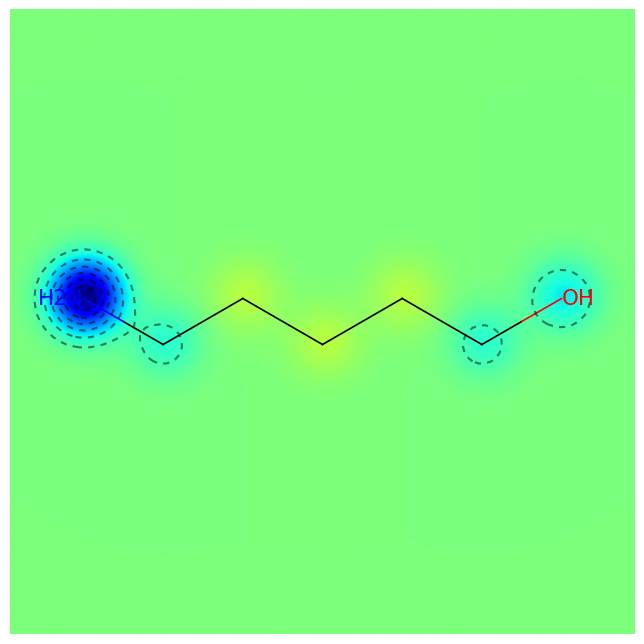

In [20]:
mol_chem = Chem.MolFromSmiles("C(N)CCCCO")
contribs = rdMolDescriptors._CalcCrippenContribs(mol_chem)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol_chem,[x for x,y in contribs], colorMap='jet', contourLines=10);
# fig.savefig('CrippenContribs.png', bbox_inches='tight')

In [26]:
contribs

[(-0.2035, 2.753),
 (-1.019, 2.262),
 (0.1441, 2.503),
 (0.1441, 2.503),
 (0.1441, 2.503),
 (-0.2035, 2.753),
 (-0.2893, 0.8238)]